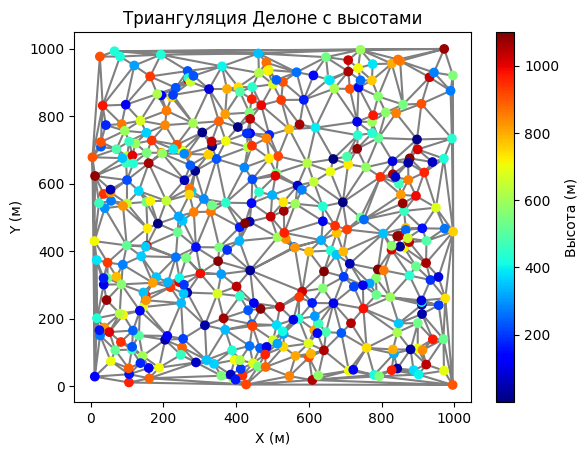

Средняя относительная погрешность интерполяции: 120.1737611177829 %


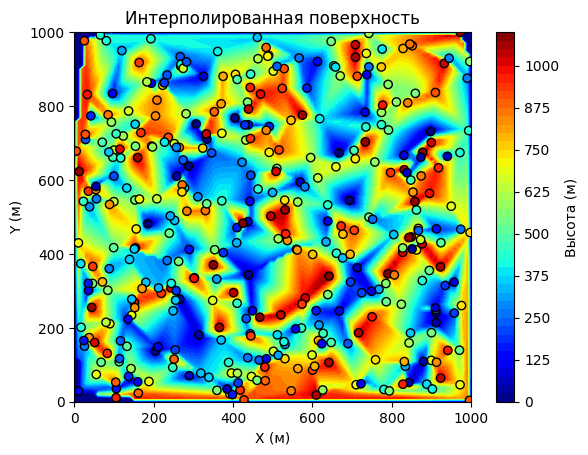

Случайная точка: (10.833981200946251, 698.2720212026153), высота: 910.939041424792


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.spatial

# Параметры
N = 11  # Укажите свой номер варианта
num_points = 400  # Количество точек
square_size = 1000  # Размер квадрата (м)
height_range = (0, 100 * N)  # Диапазон высот

x = np.random.uniform(0, square_size, num_points)
y = np.random.uniform(0, square_size, num_points)
z = np.random.uniform(height_range[0], height_range[1], num_points)
points = np.column_stack((x, y))

delaunay_triangulation = scipy.spatial.Delaunay(points)

plt.triplot(x, y, delaunay_triangulation.simplices, color='gray')
plt.scatter(x, y, c=z, cmap='jet', marker='o')
plt.colorbar(label='Высота (м)')
plt.xlabel('X (м)')
plt.ylabel('Y (м)')
plt.title('Триангуляция Делоне с высотами')
plt.show()


def barycentric_coordinates(triangle, p):
    A, B, C = triangle
  
    detT = (B[1] - C[1]) * (A[0] - C[0]) + (C[0] - B[0]) * (A[1] - C[1])
    
    alpha = ((B[1] - C[1]) * (p[0] - C[0]) + (C[0] - B[0]) * (p[1] - C[1])) / detT
    beta = ((C[1] - A[1]) * (p[0] - C[0]) + (A[0] - C[0]) * (p[1] - C[1])) / detT
    gamma = 1 - alpha - beta
    
    return alpha, beta, gamma

def interpolate_barycentric(triangle, p, heights):
    alpha, beta, gamma = barycentric_coordinates(triangle, p)
    return alpha * heights[0] + beta * heights[1] + gamma * heights[2]

num_test_points = 10
test_x = np.random.uniform(0, square_size, num_test_points)
test_y = np.random.uniform(0, square_size, num_test_points)
test_points = np.column_stack((test_x, test_y))
estimated_heights = []

for point in test_points:
    simplex_index = delaunay_triangulation.find_simplex(point)
    if simplex_index != -1:
        triangle = delaunay_triangulation.simplices[simplex_index]
        triangle_points = points[triangle]
        triangle_heights = z[triangle]
        height = interpolate_barycentric(triangle_points, point, triangle_heights)
        estimated_heights.append(height)

real_heights = np.random.uniform(height_range[0], height_range[1], num_test_points)
relative_errors = np.abs((np.array(estimated_heights) - real_heights) / real_heights) * 100
mean_error = np.nanmean(relative_errors)

print("Средняя относительная погрешность интерполяции:", mean_error, "%")

grid_x, grid_y = np.meshgrid(np.linspace(0, square_size, 100), np.linspace(0, square_size, 100))
grid_z = np.zeros(grid_x.shape)

for i in range(grid_x.shape[0]):
    for j in range(grid_x.shape[1]):
        point = np.array([grid_x[i, j], grid_y[i, j]])
        simplex_index = delaunay_triangulation.find_simplex(point)
        if simplex_index != -1:
            triangle = delaunay_triangulation.simplices[simplex_index]
            triangle_points = points[triangle]
            triangle_heights = z[triangle]
            grid_z[i, j] = interpolate_barycentric(triangle_points, point, triangle_heights)

plt.contourf(grid_x, grid_y, grid_z, cmap='jet', levels=50)
plt.colorbar(label='Высота (м)')
plt.scatter(x, y, c=z, cmap='jet', edgecolors='k', marker='o')
plt.xlabel('X (м)')
plt.ylabel('Y (м)')
plt.title('Интерполированная поверхность')
plt.show()

random_point = np.random.uniform(0, square_size, 2)
random_x, random_y = random_point

simplex_index = delaunay_triangulation.find_simplex(random_point)
if simplex_index == -1:
    print("Точка находится за пределами области.")
else:
    triangle = delaunay_triangulation.simplices[simplex_index]
    triangle_points = points[triangle]
    triangle_heights = z[triangle]
    
    interpolated_height = interpolate_barycentric(triangle_points, random_point, triangle_heights)
    print(f"Случайная точка: ({random_x}, {random_y}), высота: {interpolated_height}")